# The second version of EDA

In [131]:
# Imports
import pandas as pd
import config as conf
import matplotlib.pyplot as plt

In [132]:
df = pd.read_csv(conf.CSV_FILE)

df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


## Calculating mean ship size in dataset

In [133]:
def calc_ship_size(encoded_pixels: str) -> int:
    if not isinstance(encoded_pixels, str):
        return 0
    
    shifts = encoded_pixels.split(" ")
    
    sum = 0
    for i in range(1, len(shifts), 2):
        sum += int(shifts[i])
    
    return sum    


In [134]:
ship_occurances = df["EncodedPixels"].apply(calc_ship_size)

print(f"The mean ship occurance area in dataset - {ship_occurances.mean()}")

The mean ship occurance area in dataset - 552.7868005627433


In [135]:
images_with_ships_df = df[~df["EncodedPixels"].isnull()]

ship_sizes = images_with_ships_df["EncodedPixels"].apply(calc_ship_size)

mean_size = ship_sizes.mean()
size_std = ship_sizes.std()

print("Mean ship size", round(mean_size, 2))
print("Min ship size", ship_sizes.min())
print("Max ship size", ship_sizes.max())
print("Ship size standart deviation", round(size_std, 2))

Mean ship size 1567.4
Min ship size 2
Max ship size 25904
Ship size standart deviation 2842.08


In [136]:
counts = ship_sizes.value_counts()

most_frequent_value = counts.idxmax()
least_frequent_value = counts.idxmin()

print(most_frequent_value)
print(least_frequent_value)

36
12886


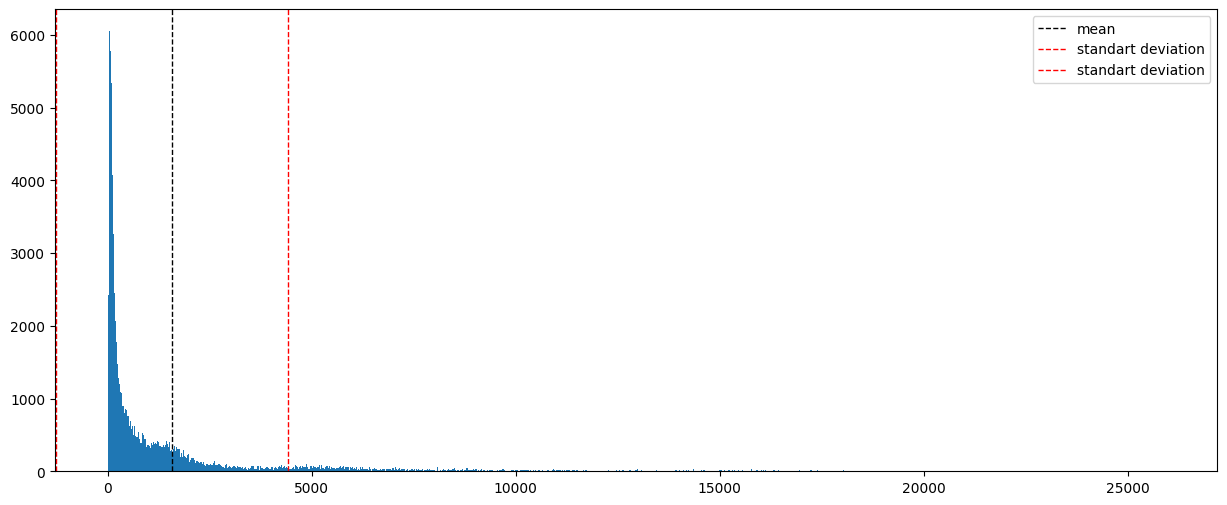

In [137]:
plt.figure(figsize=(15, 6))

plt.hist(ship_sizes, bins=1000)
plt.axvline(ship_sizes.mean(), color='k', linestyle='dashed', linewidth=1, label="mean")
plt.axvline(mean_size + size_std , color='r', linestyle='dashed', linewidth=1, label="standart deviation")
plt.axvline(mean_size - size_std , color='r', linestyle='dashed', linewidth=1, label="standart deviation")
plt.legend()
plt.show()

#### The results:
1) The mean ship occurance area in dataset - 552.78
2) The mean ship area - 1567.4
3) Minimal ship size - 2
4) Maximum ship size - 25904
5) Ship size standart deviation - 2842.08
6) Ship most and least frequent area values - 36, 12886

## Calculating part of empty images

In [138]:
all_df_size = len(df)
all_df_size

231722

In [139]:
empty_images_size = all_df_size - len(images_with_ships_df)
empty_images_size

149999

In [140]:
empty_images_part = empty_images_size / all_df_size
empty_images_part

0.6473230854213238

The part of empty images is 64.73% 

#### Results:
1) Size of dataset - 231722
2) Number of images without a ship - 149999
3) Part of images without a ship - 64.73%

## Spacial FFT